<a href="https://colab.research.google.com/github/shihanrehman/DBRS_interviewChallenge/blob/master/Final_NYC_Boroughs_with_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Start (Load the CSV File)<br>

load libraries and download *.csv

In [0]:
#import libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [2]:
print ('Pandas version is:', pd.__version__) 

Pandas version is: 0.22.0


Let's download ZipCode_Population.csv & Complaints_2017data.rar, rename and unrar it.

In [3]:
current_dir_files = os.listdir('.')
print (current_dir_files)

['.config', 'sample_data']


In [4]:
if '311_Service_Requests_from_2010_to_Present.csv' not in current_dir_files:
  
  !wget –q 'https://www.dropbox.com/s/ipa7s8gxx5vuoi3/Complaints_2017data.rar?dl=1'
  os.rename ('Complaints_2017data.rar?dl=1', 'Complaints_2017data.rar')
  !unrar e -inul -y 'Complaints_2017data.rar'

--2018-12-22 17:09:54--  http://xn--q-5gn/
Resolving xn--q-5gn (xn--q-5gn)... failed: Name or service not known.
wget: unable to resolve host address ‘xn--q-5gn’
--2018-12-22 17:09:55--  https://www.dropbox.com/s/ipa7s8gxx5vuoi3/Complaints_2017data.rar?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ipa7s8gxx5vuoi3/Complaints_2017data.rar [following]
--2018-12-22 17:09:55--  https://www.dropbox.com/s/dl/ipa7s8gxx5vuoi3/Complaints_2017data.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1f3cdb116e00747f43f9126630.dl.dropboxusercontent.com/cd/0/get/AX9M9q1GFNlGChI9MJlFHMc6M2_p3NVd5wYNuCmu4leA4bshG_50lBRA0fYdu3lQNXaFUl_ft8XdevxyTqwAfPtWz_-5hDjQ0wfjAmHIUrF3M0uJLleuLCIAxBU0mF-c9JzmaxJxForuEpeHnmyCdBBc_A8symDmqoHYhZeG

In [0]:
if 'ZipCode_Population.csv' not in current_dir_files:
  
  !wget -q 'https://www.dropbox.com/s/m12qqydweossgzm/ZipCode_Population.csv?dl=1'
  os.rename ('ZipCode_Population.csv?dl=1', 'ZipCode_Population.csv')

In [6]:
# Lets look at the data and analyze it.  

data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header = 0, nrows=10)
data.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37188206,09/14/2017 04:40:33 PM,10/19/2018 07:30:48 AM,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11374,63-11 WETHEROLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.728620,-73.865295,"(40.728619539832, -73.865295234063)"
1,35735866,03/18/2017 10:09:57 AM,10/19/2018 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Curb Cut/Driveway/Carport - Illegal,NaN,11420,111-36 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680213,-73.821227,"(40.680213167851, -73.821227012238)"


In [7]:
print ('Columns: ', data.columns.values)

Columns:  ['Unique Key' 'Created Date' 'Closed Date' 'Agency' 'Agency Name'
 'Complaint Type' 'Descriptor' 'Location Type' 'Incident Zip'
 'Incident Address' 'Street Name' 'Cross Street 1' 'Cross Street 2'
 'Intersection Street 1' 'Intersection Street 2' 'Address Type' 'City'
 'Landmark' 'Facility Type' 'Status' 'Due Date' 'Resolution Description'
 'Resolution Action Updated Date' 'Community Board' 'BBL' 'Borough'
 'X Coordinate (State Plane)' 'Y Coordinate (State Plane)'
 'Open Data Channel Type' 'Park Facility Name' 'Park Borough'
 'Vehicle Type' 'Taxi Company Borough' 'Taxi Pick Up Location'
 'Bridge Highway Name' 'Bridge Highway Direction' 'Road Ramp'
 'Bridge Highway Segment' 'Latitude' 'Longitude' 'Location']


###Part A - Validate and clean the data, and ensure that it is from 2017

[link text](https://)


Create a script that grabs data from the CSV using the Pandas library. 

In [8]:
col_names = ['Complaint Type', 'Borough', 'Created Date', 'Incident Zip']
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header = 0, usecols = col_names)
data.head(2) #display the first 2 rows

,Created Date,Complaint Type,Incident Zip,Borough
0,09/14/2017 04:40:33 PM,New Tree Request,11374,QUEENS
1,03/18/2017 10:09:57 AM,General Construction/Plumbing,11420,QUEENS


In [9]:
print ("data DataFrame's shape is: ", data.shape)

data DataFrame's shape is:  (2461176, 4)


In [10]:
# Unique values in 'Borough' column

data.Borough.unique()

array(['QUEENS', 'BROOKLYN', 'MANHATTAN', 'BRONX', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

In [11]:
# Let's drop the 'Unspecified' values in column 'Borough'

boroughs = ['QUEENS', 'BROOKLYN', 'MANHATTAN', 'BRONX','STATEN ISLAND']
bor = data['Borough'].isin(boroughs)
data = data[bor]
data.shape

(2419694, 4)

In [12]:
# Let's look at column 'Incident Zip'

data['Incident Zip'].unique()

array([11374.0, 11420.0, 11230.0, 10028.0, 10467.0, 10003.0, 11385.0,
       11418.0, 10458.0, 11423.0, 11105.0, 10457.0, 11226.0, 10034.0,
       10466.0, 11220.0, 11360.0, 10029.0, 11212.0, 11209.0, 10011.0,
       11358.0, 11434.0, 11218.0, 10002.0, 11364.0, 11201.0, 10455.0,
       11213.0, 11354.0, 11362.0, 11361.0, 11216.0, 11237.0, 10033.0,
       11355.0, 11356.0, 11432.0, 10019.0, 11357.0, 11366.0, 10024.0,
       10025.0, 11365.0, 11203.0, 11413.0, 11370.0, 11204.0, 11435.0,
       11236.0, 11427.0, 11219.0, 11367.0, 11363.0, 11205.0, 10016.0,
       10469.0, 11208.0, 10027.0, 11221.0, 10461.0, 11235.0, 11233.0,
       10462.0, 11429.0, 10464.0, 10473.0, 10465.0, 11375.0, 11231.0,
       11223.0, 11421.0, 11415.0, 11373.0, 10463.0, 11103.0, 11377.0,
       11414.0, 10456.0, 11368.0, 10005.0, 10453.0, 11004.0, 11215.0,
       11249.0, 10036.0, 11104.0, 11379.0, 10014.0, 10010.0, 11207.0,
       10472.0, 11210.0, 11416.0, 11101.0, 10309.0, 11433.0, 11369.0,
       10306.0, 1045

column 'Incident Zip' containts NaN, 'Unknow' and other values, that are not a zip code

lets remove it

In [0]:
values_to_remove = ['NOT SURE', 'UNKNOWN', '.', '0']

In [14]:
data = data[~(data['Incident Zip'].isin(values_to_remove))]
# remove NaN

data = data[~((data['Incident Zip'].isnull()))]
data['Incident Zip'] = data['Incident Zip'].astype('int')
data.shape

(2338893, 4)

In [15]:
# Let's look at column 'Created Date'

print (data['Created Date'].min())
print (np.sort(data['Created Date'].unique())[:2])

01/01/2017 01:00:17 AM
['01/01/2017 01:00:17 AM' '01/01/2017 01:00:26 AM']


minimal data & time in column 'Created Date' is the beginning of 2017 year<br>
it satisfies the condition: Created Date (Should all be from 2017)

In [16]:
print (data['Created Date'].max())


12/31/2017 12:59:35 PM


###Part B - Find the 10 most common overall “Complaint types” for the year 2017 

In [17]:
data['Complaint Type'].value_counts()[:10]

Noise - Residential        229458
HEAT/HOT WATER             213477
Illegal Parking            144827
Blocked Driveway           135056
Street Condition            90343
UNSANITARY CONDITION        79260
Noise - Street/Sidewalk     72867
Water System                63700
Noise                       59466
PAINT/PLASTER               57069
Name: Complaint Type, dtype: int64

###Part C - How many of each of those 10 types were there in 2017, for each borough?

In [18]:
# How many of each of those 10 types were there in 2017, for each borough?

com_top_10 = data['Complaint Type'].value_counts()[:10].index
temp_df = data[data['Complaint Type'].isin(com_top_10)].groupby(['Borough'])['Complaint Type'].value_counts()
temp_df

Borough        Complaint Type         
BRONX          HEAT/HOT WATER             68713
               Noise - Residential        57663
               Blocked Driveway           24574
               UNSANITARY CONDITION       24557
               PAINT/PLASTER              19493
               Illegal Parking            16122
               Noise - Street/Sidewalk    14025
               Street Condition           11155
               Water System                9974
               Noise                       3056
BROOKLYN       Noise - Residential        67629
               HEAT/HOT WATER             66977
               Illegal Parking            55380
               Blocked Driveway           49301
               UNSANITARY CONDITION       26654
               Street Condition           24876
               Noise - Street/Sidewalk    21313
               Water System               19508
               PAINT/PLASTER              19398
               Noise                      15227
M

In [19]:
# How many of each of those 10 types were there in 2017, for each borough?
# The same data in another, more visual view

temp_df.unstack().fillna(0)

Complaint Type,Blocked Driveway,HEAT/HOT WATER,Illegal Parking,Noise,Noise - Residential,Noise - Street/Sidewalk,PAINT/PLASTER,Street Condition,UNSANITARY CONDITION,Water System
Borough,,,,,,,,,,
BRONX,24574,68713,16122,3056,57663,14025,19493,11155,24557,9974
BROOKLYN,49301,66977,55380,15227,67629,21313,19398,24876,26654,19508
MANHATTAN,3428,46528,19686,28754,51026,29146,11486,14497,14631,10667
QUEENS,54288,29186,46065,10523,46396,7530,5682,29495,11467,18279
STATEN ISLAND,3465,2073,7574,1906,6744,853,1010,10320,1951,5272


In [0]:
# Output a generated CSV with the result to file '10_most_overall_Complaint types_for_Borough_2017.csv'

temp_df.to_csv('10_most_overall_Complaint types_for_Borough_2017.csv', header = True)

###Part D - Find the 10 most populous zip codes that belong to boroughs of NYC from the US census data<br>
The '2017 US Census Population'’ has zip codes with their corresponding population counts for all zip codes in the US; however, we need to extract the zip codes and respective populations that have matching zip code values in the  "2017 Complaints " CSV files.  One the zipcode values are matched up, take the greatest 10 as the 10 most populous zipcodes.  

In [21]:
# Read ZipCode_Population.csv to Pandas DataFrame zip_code_poplations

zip_code_population = pd.read_csv('ZipCode_Population.csv', header = 0)
zip_code_population.rename(columns = {'Zip Code ZCTA':'zip_code'}, inplace=True)
zip_code_population.head()

,zip_code,2017 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [22]:
# Extract the list of all unique zip codes in the “Incident_zip” field

all_unique_zip_codes = data['Incident Zip'].unique()
all_unique_zip_codes[:20] #filter to 20 results

array([11374, 11420, 11230, 10028, 10467, 10003, 11385, 11418, 10458,
       11423, 11105, 10457, 11226, 10034, 10466, 11220, 11360, 10029,
       11212, 11209])

In [23]:
print ('number of all unique zip codes in the "Incident_zip" is: ', len(all_unique_zip_codes))

number of all unique zip codes in the "Incident_zip" is:  265


In [24]:
# and match them up with the values from the ‘ZipCode_Population’.

zip_code_population[zip_code_population.zip_code.isin(all_unique_zip_codes)].shape[0]

216

**! DataFrame 'zip_code_populations' contains only 216 zip-codes from 265 in DataFrame 'data' with Complaints**<br>
we have to redefine the 10 most popular zip codes with this in mind 

In [25]:
temp_df = zip_code_population[zip_code_population.zip_code.isin(all_unique_zip_codes)]
temp_df.sort_values('2017 Census Population', ascending=False)[:10]
#The 10 most populous zip codes are outputted below 

,zip_code,2017 Census Population
2748,11368,109931
2720,11226,101572
2753,11373,100820
2714,11220,99598
2759,11385,98592
2527,10467,97060
2451,10025,94600
2702,11208,94469
2729,11236,93877
2701,11207,93386


In [26]:
# Let's make sure everything is done right and  look at the number of unique zip codes

temp_df.zip_code.nunique()

216

In [0]:
# Let's make array with 10 most populous zip codes

ten_most_populous_zip_codes = temp_df.sort_values('2017 Census Population', ascending=False)[:10]['zip_code'].values

###<b>Part E -  Consider only the 10 most common overall complaint types for the 10 most populous zip codes found in Part D, how many of each of those 10  complaint types were there in 2017 for each of the 10 most populous zip codes.?<br>

In [28]:
print ('10 most populous zip codes in our data DataFrame with complaints: \n', ten_most_populous_zip_codes )

10 most populous zip codes in our data DataFrame with complaints: 
 [11368 11226 11373 11220 11385 10467 10025 11208 11236 11207]


In [0]:
temp_df = data[(data['Complaint Type'].isin(com_top_10)) & (data['Incident Zip'].isin(ten_most_populous_zip_codes))]

In [30]:
temp_df.head()

,Created Date,Complaint Type,Incident Zip,Borough
371,11/06/2017 05:33:00 PM,Noise,11385,QUEENS
574,10/30/2017 08:47:48 PM,UNSANITARY CONDITION,11373,QUEENS
621,12/29/2017 10:52:00 AM,Water System,11385,QUEENS
709,04/28/2017 05:02:48 AM,UNSANITARY CONDITION,11368,QUEENS
710,04/28/2017 05:02:48 AM,UNSANITARY CONDITION,11368,QUEENS


In [0]:
# These are our values, which should = to a 100.  

temp_df = temp_df.groupby(['Incident Zip'])['Complaint Type'].value_counts().unstack()

In [32]:
temp_df

Complaint Type,Blocked Driveway,HEAT/HOT WATER,Illegal Parking,Noise,Noise - Residential,Noise - Street/Sidewalk,PAINT/PLASTER,Street Condition,UNSANITARY CONDITION,Water System
Incident Zip,,,,,,,,,,
10025,125,2397,735,1398,2085,1224,604,628,714,481
10467,2067,6041,982,285,5803,712,1955,612,2192,560
11207,2061,2461,1495,199,3060,558,1055,1142,1621,757
11208,2751,2052,2148,188,2792,825,800,816,1341,710
11220,1558,1634,2012,442,1522,498,506,690,719,674
11226,2200,7569,1073,440,4852,1831,2639,491,3155,406
11236,3038,1145,1430,108,1929,201,347,1021,562,623
11368,4380,1620,1250,158,2460,684,361,561,639,617
11373,2623,3408,1270,270,1841,304,265,691,756,372


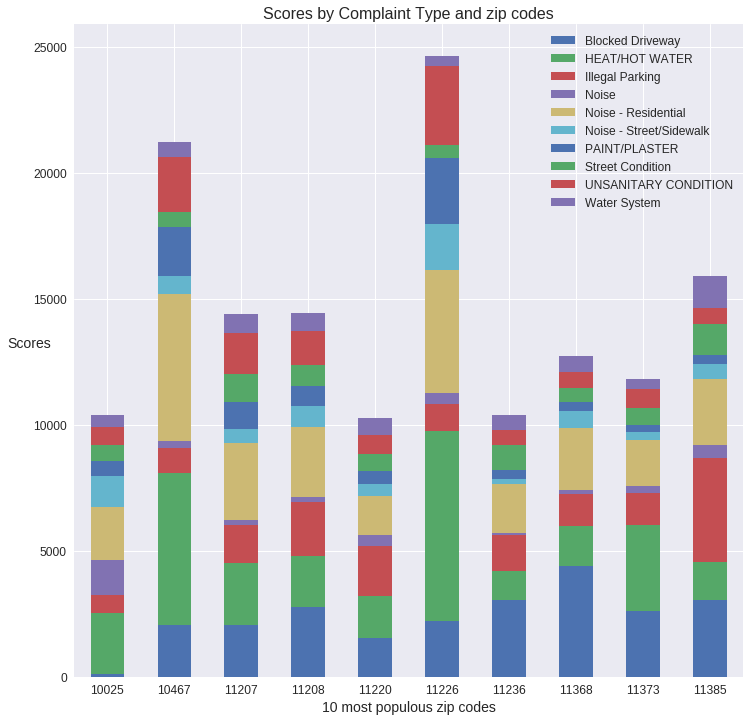

In [33]:
temp_df[temp_df.columns].plot.bar(stacked=True, figsize = [12, 12])
plt.title('Scores by Complaint Type and zip codes', fontsize=16)
plt.xlabel('10 most populous zip codes', rotation=0, fontsize=14)
plt.ylabel('Scores', rotation=0, fontsize=14)
plt.xticks( rotation=0, fontsize=12)
plt.yticks( rotation=0, fontsize=12)
plt.legend(fontsize=12, loc = 1)
plt.show()

###Part F - Considering all complaint types. Which boroughs are the biggest "complainers" relative to the size of the population in 2017? Meaning, calculate a complaint-index that adjusts for population of the borough.

In [34]:
data.head()

,Created Date,Complaint Type,Incident Zip,Borough
0,09/14/2017 04:40:33 PM,New Tree Request,11374,QUEENS
1,03/18/2017 10:09:57 AM,General Construction/Plumbing,11420,QUEENS
2,03/29/2017 12:38:28 PM,General Construction/Plumbing,11230,BROOKLYN
3,06/05/2017 12:47:55 PM,New Tree Request,10028,MANHATTAN
4,06/15/2017 11:56:36 AM,Dead/Dying Tree,10467,BRONX


In [35]:
# From the data DataFrame calculate the total number of complaints by borough

total_complaints_df = data['Borough'].value_counts().to_frame()
total_complaints_df.rename(columns={'Borough':'Total_complaints_number'}, inplace= True)
total_complaints_df.head()

,Total_complaints_number
BROOKLYN,746347
QUEENS,571670
MANHATTAN,462356
BRONX,433008
STATEN ISLAND,125512


In [36]:
# Lets calculate the quantity of Borough's populations

temp_df = data[['Incident Zip','Borough']]
temp_df.rename(columns = {'Incident Zip' : 'zip_code'}, inplace=True)
temp_df.drop_duplicates(['zip_code'], inplace = True)

display(temp_df.head())
print ("\nDataFrame's temp_df shape is ", temp_df.shape)
print ("Number unique zip code in temp_df DataFrame is ", temp_df.zip_code.nunique())

,zip_code,Borough
0,11374,QUEENS
1,11420,QUEENS
2,11230,BROOKLYN
3,10028,MANHATTAN
4,10467,BRONX



DataFrame's temp_df shape is  (265, 2)
Number unique zip code in temp_df DataFrame is  265


In [37]:
zip_code_population.head(2)

,zip_code,2017 Census Population
0,1001,16769
1,1002,29049


In [38]:
temp_df = pd.merge(temp_df, zip_code_population, how = 'left', on= 'zip_code' )
temp_df['2017 Census Population'].fillna(0, inplace=True)
temp_df.head()

,zip_code,Borough,2017 Census Population
0,11374,QUEENS,43600.0
1,11420,QUEENS,44354.0
2,11230,BROOKLYN,86408.0
3,10028,MANHATTAN,45141.0
4,10467,BRONX,97060.0


In [39]:
# Final dataset with quantity populations of Boroughs

borough_population_df = temp_df[['Borough', '2017 Census Population']].groupby('Borough')['2017 Census Population'].sum().to_frame()
borough_population_df.head()

,2017 Census Population
Borough,
BRONX,1437243.0
BROOKLYN,2504700.0
MANHATTAN,1595338.0
QUEENS,2390901.0
STATEN ISLAND,468730.0


In [40]:
# Let's merge two DataFrames

complaint_index_df = pd.merge(borough_population_df, total_complaints_df, how = 'left', left_index=True, right_index=True)
complaint_index_df['2017 Census Population'] = complaint_index_df['2017 Census Population'].astype('int')
complaint_index_df.head()

,2017 Census Population,Total_complaints_number
Borough,,
BRONX,1437243,433008
BROOKLYN,2504700,746347
MANHATTAN,1595338,462356
QUEENS,2390901,571670
STATEN ISLAND,468730,125512


In [41]:
# And calculate complaint ratio to the size of the population of each borough 

complaint_index_df['ratio']= complaint_index_df['Total_complaints_number']/complaint_index_df['2017 Census Population']
complaint_index_df.sort_values('ratio', ascending=False).head()

,2017 Census Population,Total_complaints_number,ratio
Borough,,,
BRONX,1437243,433008,0.301277
BROOKLYN,2504700,746347,0.297979
MANHATTAN,1595338,462356,0.289817
STATEN ISLAND,468730,125512,0.267770
QUEENS,2390901,571670,0.239102


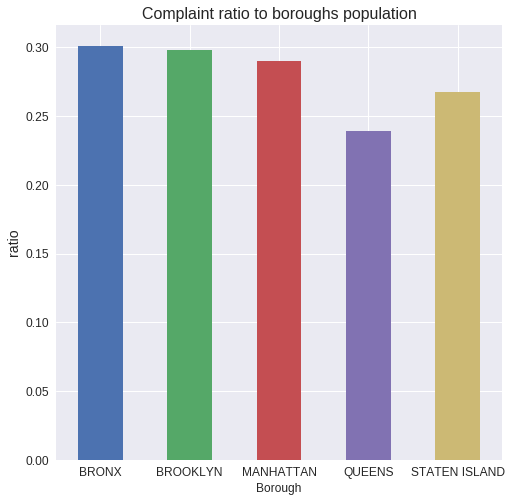

In [42]:
complaint_index_df['ratio'].plot.bar(figsize = [8, 8])
plt.title('Complaint ratio to boroughs population', fontsize=16)
plt.xlabel('Borough', rotation=0, fontsize=12)
plt.ylabel('ratio', rotation=90, fontsize=14)
plt.xticks( rotation=0, fontsize=12)
plt.yticks( rotation=0, fontsize=12)
plt.show()